### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
import seaborn as sns
%matplotlib inline

### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [395]:
data = pd.read_csv('vehicle.csv', sep = ',')
data = data.dropna()
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [396]:
data.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### Inference:
- No missing values. So no corrective action needed

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

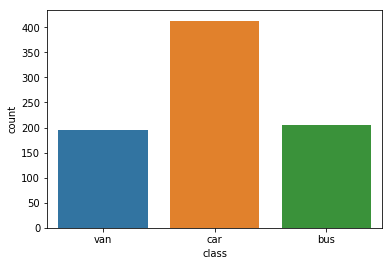

In [397]:
sns.countplot(data['class'])

In [398]:
data['class'].groupby(data['class']).value_counts()

class  class
bus    bus      205
car    car      413
van    van      195
Name: class, dtype: int64

### Inference:
- There are 3 types of vehicles in the list: car, can and bus
- The number of cars is nearly double that of the number of van or bus
- Van and bus have similar number of entries in the dataset

### Check for any missing values in the data 

In [399]:
data.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### Inference: 
- None of the columns have any missing values at this time 

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [400]:
data_features = data.drop(['class'], axis = 1)
data_features.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,813.0,93.656827,8.233751,73.0,87.0,93.0,100.0,119.0
circularity,813.0,44.803198,6.146659,33.0,40.0,44.0,49.0,59.0
distance_circularity,813.0,82.043050,15.783070,40.0,70.0,79.0,98.0,112.0
radius_ratio,813.0,169.098401,33.615402,104.0,141.0,167.0,195.0,333.0
pr.axis_aspect_ratio,813.0,61.774908,7.973000,47.0,57.0,61.0,65.0,138.0
max.length_aspect_ratio,813.0,8.599016,4.677174,2.0,7.0,8.0,10.0,55.0
scatter_ratio,813.0,168.563346,33.082186,112.0,146.0,157.0,198.0,265.0
elongatedness,813.0,40.988930,7.803380,26.0,33.0,43.0,46.0,61.0
pr.axis_rectangularity,813.0,20.558426,2.573184,17.0,19.0,20.0,23.0,29.0
max.length_rectangularity,813.0,147.891759,14.504648,118.0,137.0,146.0,159.0,188.0


##### The class (target) variable has been removed as the unsupervised learning will be performed on the features not on target

In [401]:
# standardizing the data

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02,8.130000e+02
mean,-2.425284e-16,-4.642999e-16,-2.351542e-16,3.665238e-16,-2.047016e-16,-1.349201e-16,3.714399e-16,-2.062038e-16,-2.651972e-16,-7.398756e-16,-3.031605e-17,-3.550529e-17,3.348422e-16,1.312159e-16,-1.693329e-17,9.845889e-17,-1.169490e-15,3.482249e-16
std,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00,1.000616e+00
min,-2.510344e+00,-1.921444e+00,-2.665447e+00,-1.937757e+00,-1.854258e+00,-1.411767e+00,-1.710835e+00,-1.922008e+00,-1.383740e+00,-2.062109e+00,-1.874279e+00,-1.452266e+00,-2.019423e+00,-1.793474e+00,-1.291420e+00,-1.422141e+00,-2.110457e+00,-1.992013e+00
25%,-8.089782e-01,-7.819133e-01,-7.635057e-01,-8.363933e-01,-5.992534e-01,-3.420870e-01,-6.824590e-01,-1.024408e+00,-6.060138e-01,-7.513773e-01,-6.863524e-01,-6.872619e-01,-7.815035e-01,-7.227236e-01,-8.847879e-01,-7.496057e-01,-8.096219e-01,-6.396066e-01
50%,-7.982157e-02,-1.307527e-01,-1.929234e-01,-6.246222e-02,-9.725132e-02,-1.281510e-01,-3.497491e-01,2.578765e-01,-2.171510e-01,-1.305046e-01,-3.010789e-01,-4.246486e-01,-3.875161e-02,-1.873484e-01,-7.152328e-02,-1.891593e-01,3.400092e-03,1.718371e-01
75%,7.708611e-01,6.831980e-01,1.011639e+00,7.710020e-01,4.047507e-01,2.997208e-01,8.903515e-01,6.425619e-01,9.494376e-01,7.663115e-01,9.189540e-01,8.427456e-01,7.349483e-01,3.480268e-01,5.384252e-01,7.075550e-01,6.538177e-01,7.127995e-01
max,3.079857e+00,2.311100e+00,1.899212e+00,4.878790e+00,9.566288e+00,9.926837e+00,2.916857e+00,2.565989e+00,3.282615e+00,2.766901e+00,4.225885e+00,3.309026e+00,2.901308e+00,8.378655e+00,3.181535e+00,3.173519e+00,2.767675e+00,2.065206e+00


### Inference:
- The data has been scaled as is seen from the descrive function output

### K - Means Clustering

### Assign a dummy array called Cluster_error

In [402]:
Cluster_error = []
Cluster_error

[]

- Dummy list has been assigned

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [403]:
# KMeans Clustring Algorithm
# Label, Intertia and Centroid
cluster_range = range( 1, 11)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
#cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, init='k-means++')
  clusters.fit(data_scaled)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,14634.000000
1,2,8623.136976
2,3,7037.467395
3,4,5740.480402
4,5,5186.753590
5,6,4706.580306
6,7,4348.840290
7,8,4123.915091
8,9,3867.464217
9,10,3652.887357


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

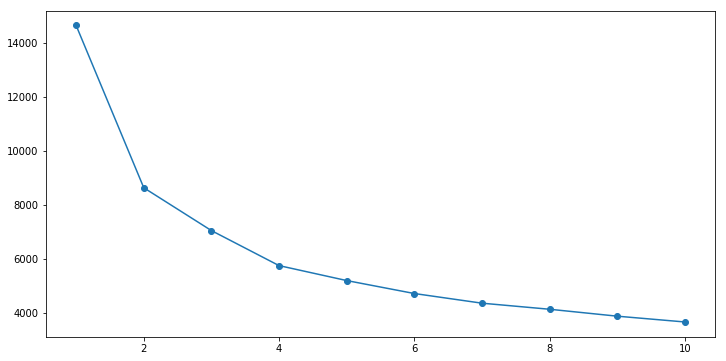

In [404]:
# Elbow plot to identify number of clusters

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Find out the optimal value of K

### From the Scree plot Optimal value for K = 4

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [405]:
cluster = KMeans( n_clusters = 4, init='k-means++' )
cluster.fit(data_scaled)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [406]:
centroids = cluster.cluster_centers_
centroids

array([[-2.28397024e-01, -5.77112825e-01, -3.08062421e-01,
        -4.12415311e-02,  1.78444965e-01, -1.73698681e-01,
        -4.56879712e-01,  3.21990722e-01, -4.85591783e-01,
        -5.39969043e-01, -4.21528655e-01, -4.61480779e-01,
        -6.05499266e-01, -6.42849115e-01, -6.23412553e-02,
         1.29630066e-02,  8.22191910e-01,  7.05383081e-01],
       [ 1.15442786e+00,  1.18428647e+00,  1.21198691e+00,
         9.73321772e-01,  9.49213388e-02,  2.18659142e-01,
         1.29796844e+00, -1.21424667e+00,  1.30184458e+00,
         1.09830595e+00,  1.20590258e+00,  1.30898668e+00,
         1.09121291e+00, -1.07878646e-01,  1.68326262e-01,
         2.67954844e-01,  4.67043879e-03,  1.90327006e-01],
       [-9.15758407e-01, -5.22402678e-01, -8.89505987e-01,
        -1.08772789e+00, -5.61970783e-01, -3.00015871e-01,
        -7.79778853e-01,  8.67364185e-01, -7.45939378e-01,
        -4.85536418e-01, -8.01746438e-01, -7.83836827e-01,
        -3.90574645e-01,  7.83159216e-01, -9.02385712e

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [407]:
centroid_df = pd.DataFrame(centroids, columns = list(data_features.columns))

Hint: Use pd.Dataframe function 

In [408]:
centroid_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.228397,-0.577113,-0.308062,-0.041242,0.178445,-0.173699,-0.456880,0.321991,-0.485592,-0.539969,-0.421529,-0.461481,-0.605499,-0.642849,-0.062341,0.012963,0.822192,0.705383
1,1.154428,1.184286,1.211987,0.973322,0.094921,0.218659,1.297968,-1.214247,1.301845,1.098306,1.205903,1.308987,1.091213,-0.107879,0.168326,0.267955,0.004670,0.190327
2,-0.915758,-0.522403,-0.889506,-1.087728,-0.561971,-0.300016,-0.779779,0.867364,-0.745939,-0.485536,-0.801746,-0.783837,-0.390575,0.783159,-0.090239,-0.296090,-1.047745,-1.103612
3,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651


### Use kmeans.labels_ function to print out the labels of the classes

In [409]:
data_features['labels'] = cluster.labels_
data_features.groupby(["labels"]).count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
labels,,,,,,,,,,,,,,,,,,
0,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310
1,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256
2,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239
3,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


### Trying out 3 neighbours as there are only 8 in one cluster

In [410]:
cluster = KMeans( n_clusters = 3, init='k-means++' )
cluster.fit(data_scaled)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [411]:
predictions = cluster.predict(data_scaled)
data_scaled = pd.DataFrame(data_scaled)
data_scaled['GROUP'] = predictions 
data_scaled['GROUP'].value_counts()

0    313
1    260
2    240
Name: GROUP, dtype: int64

### 3 is a better model

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [412]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [413]:
a= pd.DataFrame(a, columns = ['Zero', 'One'])
a.head()

,Zero,One
0,13.882785,4.438501
1,11.687256,1.250981
2,10.316397,1.449346
3,9.837412,-2.041974
4,8.691601,-4.289773


#### Shape of a

In [414]:
a.shape

(100, 2)

In [415]:
b = pd.DataFrame(b, columns = ['Zero', 'One'])
b.head()

,Zero,One
0,1.079408,18.626775
1,2.892540,22.638348
2,0.393688,20.144874
3,0.398037,17.819065
4,0.313790,22.086836


#### Shape of b

In [416]:
b.shape

(50, 2)

In [417]:
c = pd.DataFrame(c, columns = ['Zero', 'One'])


#### Shape of c

In [418]:
c.shape

(100, 2)

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [419]:
a = a.append(b)
a = a.append(c)
a.head()

,Zero,One
0,13.882785,4.438501
1,11.687256,1.250981
2,10.316397,1.449346
3,9.837412,-2.041974
4,8.691601,-4.289773


#### Shape of combined

In [420]:
a.shape

(250, 2)

### 10. Use scatter matrix to print all the 3 distributions

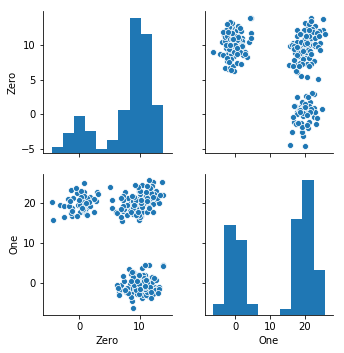

In [421]:
sns.pairplot(a)

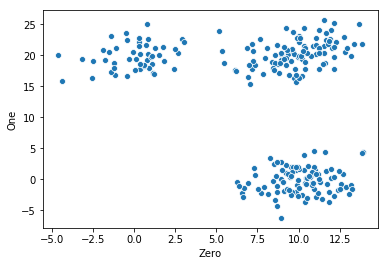

In [422]:
sns.scatterplot(x = a['Zero'], y = a['One'])

### 3 distinct clusters are seen in the scatter matrix

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [423]:
data_scaled = scaler.fit_transform(a)
#X = pd.DataFrame(data_scaled, columns = ['Zero', 'One'])
X.head()

,Zero,One,labels
0,1.340744,-0.742754,1
1,0.835221,-1.055437,1
2,0.519579,-1.035978,1
3,0.409292,-1.378463,1
4,0.145468,-1.598963,1


In [424]:
# Case 1: Ward Method
Z_ward = linkage(X, 'ward')
c, coph_dists = cophenet(Z_ward , pdist(X, metric = 'euclidean')) 
print("Cophenetic distance for Ward",c)


Cophenetic distance for Ward 0.9418648932263309


#### Linkage matrix

In [425]:
f = pd.DataFrame(Z_ward)
f

,0,1,2,3
0,159.0,247.0,0.007048,2.0
1,6.0,35.0,0.007821,2.0
2,190.0,214.0,0.008667,2.0
3,66.0,73.0,0.011381,2.0
4,175.0,233.0,0.011401,2.0
5,23.0,97.0,0.011494,2.0
6,15.0,55.0,0.011560,2.0
7,183.0,230.0,0.011576,2.0
8,52.0,98.0,0.011856,2.0
9,184.0,192.0,0.015545,2.0


### 12. Plot the dendrogram for the consolidated dataframe

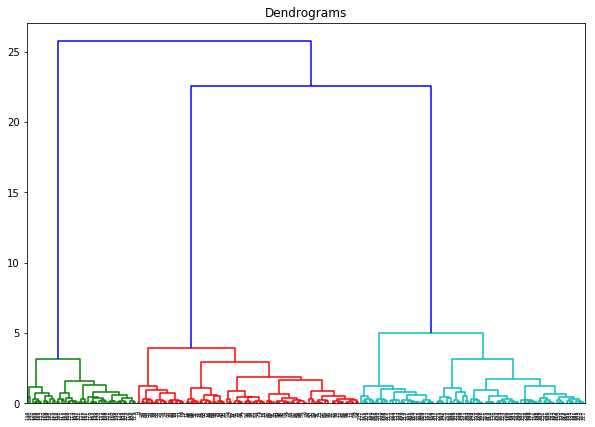

In [426]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

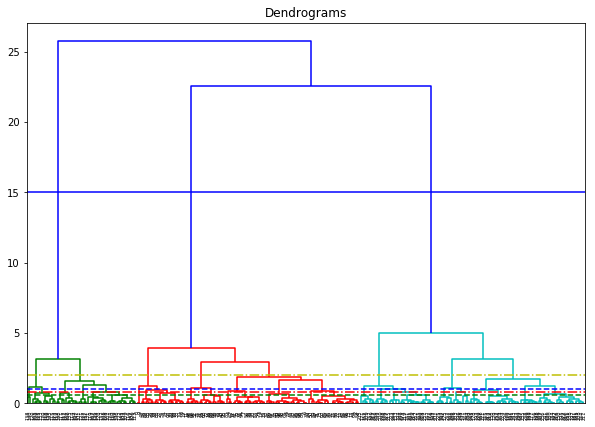

In [427]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=0.6, color='g', linestyle='--')
plt.axhline(y=0.8, color='r', linestyle='-.')
plt.axhline(y=1, color='b', linestyle='--')
plt.axhline(y=2, color='y', linestyle='-.')
plt.axhline(y=15, color='b', linestyle='-')

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

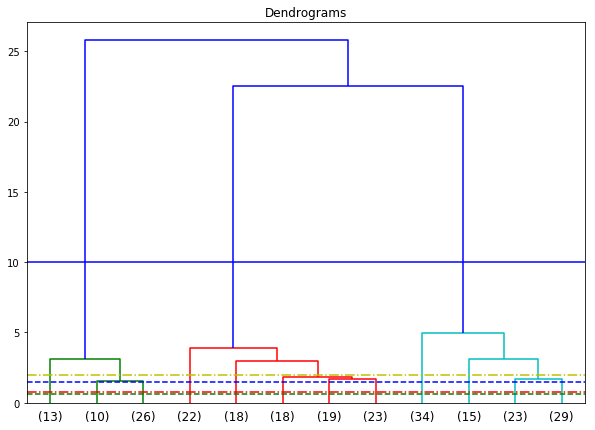

In [428]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'), p = 12, truncate_mode='lastp')
plt.axhline(y=0.6, color='g', linestyle='--')
plt.axhline(y=0.8, color='r', linestyle='-.')
plt.axhline(y=1.5, color='b', linestyle='--')
plt.axhline(y=2, color='y', linestyle='-.')
plt.axhline(y=10, color='b', linestyle='-')

### It is clear that there are 3 clusters. Hence using 3 clusters to build model

In [429]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [430]:
X['labels'] = cluster.labels_
X.groupby(["labels"]).count()

,Zero,One
labels,,
0,101,101
1,49,49
2,100,100


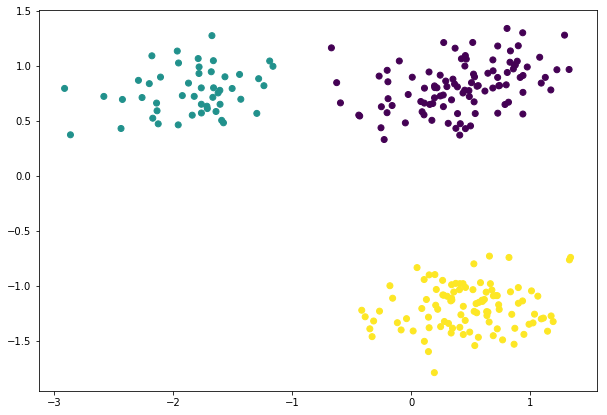

In [431]:
plt.figure(figsize=(10, 7))  
plt.scatter(X['Zero'], X['One'], c=cluster.labels_) 

### 3 nice clusters created

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [432]:
distance = 20

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [433]:
dend = shc.fcluster(shc.linkage(X, method='average'), t = distance)
dend

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 